* [blog](http://mccormickml.com/2014/02/26/kernel-regression/)
* [lec notes](https://people.eecs.berkeley.edu/~russell/classes/cs194/f11/lectures/CS194%20Fall%202011%20Lecture%2007.pdf)

# Kernel Regression

* Linear Regression is linear, Kernel Regression is non-linear
* polynomial kernel $\phi(x)^T \phi(z) = (1 + x^T z)^d$
    * $\phi(x)$ is $(1,x_1, x_2, x_1^2, x_1 x_2, x_2^2)$
    * much faster to evaluate $(1 + x^T z)^d$ than forming both $\phi(x)$ and $\phi(z)$ and calculating their dot
* gaussian kernel $k(x,z) = exp(- \frac{\|x - z\|^2_2}{2\sigma^2})$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

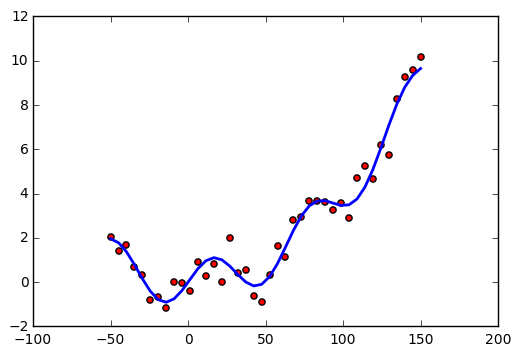

In [96]:
x = np.linspace(-50, 150, 40)
def generate_y(x):
    return np.sin(x / 10) + (x / 50) ** 2
y_real = generate_y(x)
y = y_real + np.random.normal(0, 0.5, size=y_real.shape)

plt.plot(x, y_real, lw=2)
plt.scatter(x, y, c="red")

In [97]:
def gaussian_kernel(x, x_prime, gamma=0.5):
    return np.exp(- gamma * ((x - x_prime) ** 2))

In [100]:
def predict(point, x, y, gamma=0.75):
    weights = gaussian_kernel(point, x, gamma=gamma)
    return y.dot(weights) / np.sum(weights)

# print np.max(predict(-1, x, y, gamma=0.5))

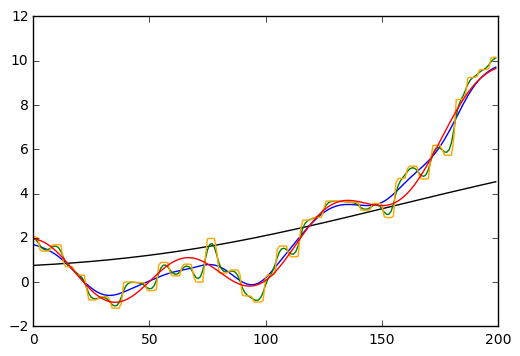

In [108]:
new_x = np.linspace(-50, 150, 200)
new_y_real = generate_y(new_x)
    
def fit(gamma, color):    
    new_y_pred = np.array([predict(pt, x, y, gamma) for pt in new_x])
    plt.plot(new_y_pred, c=color)

fit(0.0001, "black") # lol straight line
fit(0.01, "blue") # really good
fit(0.1, "green") # pretty good
fit(0.5, "orange") # can see overfitting
plt.plot(new_y_real, c="red")